# Описание задачи
Необходимо проанализировать по имеющимся данным, одобрят ли кредит заемщику. Для этого нужно визуализировать данные, вычислить основные характеристики, устранить пропущенные значения, провести нормализацию, разбить данные на обучающую и тестовые выборки и решить задачу классификации.

# Устанавливаем необходимые зависимости
- numpy
- matplotlib
- pandas


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Загружаем данные

In [156]:
data = pd.read_csv('./credit_risk_dataset.csv', sep=',', header=0, engine='python')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [157]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [158]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Описание датасета

Датасет предназначен для прогнозирования статуса кредита (будет ли кредит одобрен или нет) по параметрам заемщика: его возраст, цель получения кредита, сумма кредита и т.д.

Выведем размерность датасета

In [159]:
print(data.shape)

(32581, 12)


Выясним параметры датасета для их дальнейшего описания

In [160]:
print(data.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


# Описание параметров

- `person_age` - Возраст
- `person_income` - Годовой доход
- `person_home_ownership` - Владение домом
- `person_emp_length` - Стаж работы (в годах)
- `loan_intent` - Цель получения кредита
- `loan_grade` - Кредитный рейтинг
- `loan_amnt` - Сумма кредита
- `loan_int_rate` - Процентная ставка
- `loan_status` - Статус кредита (0 - не одобрен, 1 - одобрен)
- `loan_percent_income` - Процентный доход
- `cb_person_default_on_file` - Был ли одобрен кредит ранее
- `cb_preson_cred_hist_length` - Продолжительность кредитной истории

In [161]:
print(data.index)

RangeIndex(start=0, stop=32581, step=1)


Описательная статистика датасета (количество не NULL значений, максимальное значение, минимальное значение и т.д.) для всех параметров

In [162]:
data.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


Аналогично для только числовых параметров

In [163]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Аналогично для только категориальных параметров

In [164]:
data.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


Матрица графиков рассеивания

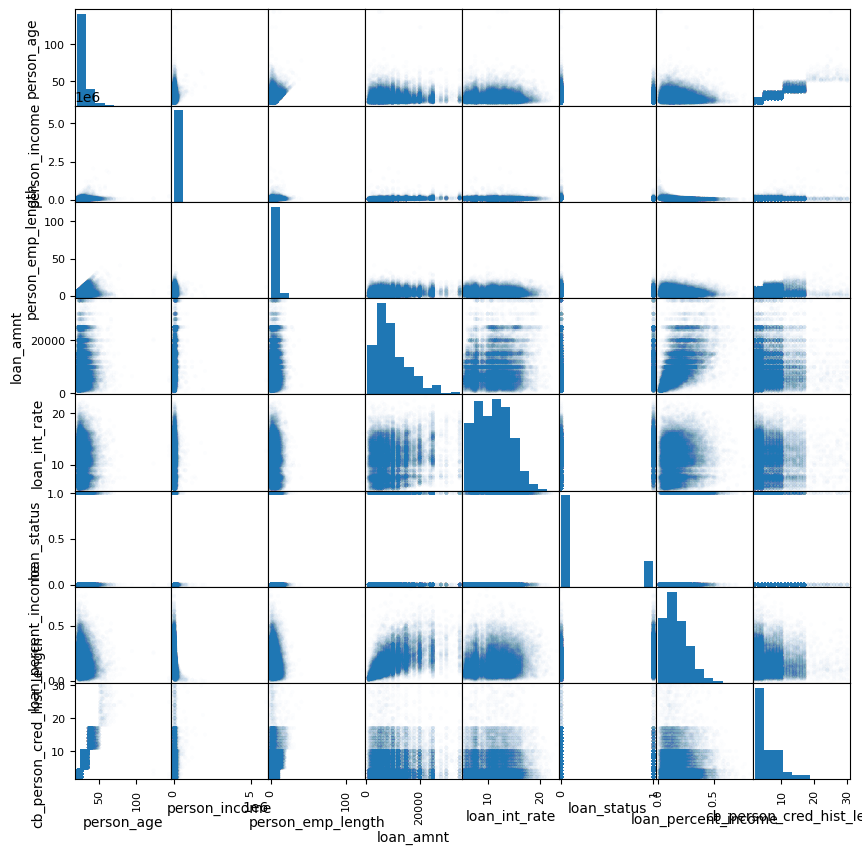

In [165]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Матрица корреляции для числовых признаков

In [166]:
data.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


Видна зависимость между параметрами `person_age` (возраст заемщика) и `cb_person_cred_hist_length` (кредитная история), что логично (чем старше заемщик, тем больше у него кредитная история), а также между параметрами `loan_percent_income` (отношение суммы кредита к годовому доходу заемщика) и `loan_amnt` (сумма займа), что тоже имеет смысл.

Для наглядности, визуализируем данную зависимость

Зависимость между `person_age` и `cb_person_cred_hist_length`

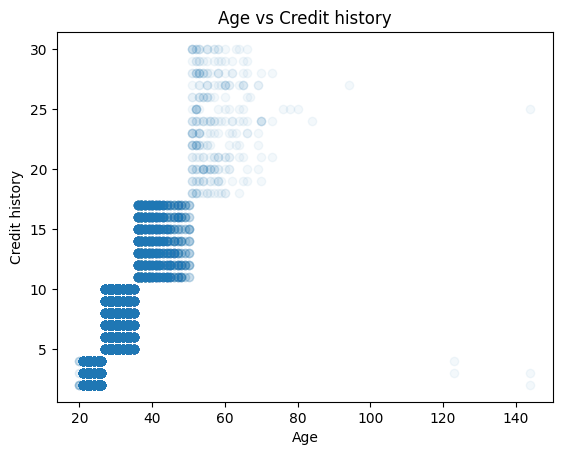

In [167]:
plt.plot(data['person_age'], data['cb_person_cred_hist_length'], 'o', alpha = 0.05)
plt.xlabel('Age')
plt.ylabel('Credit history')
plt.title('Age vs Credit history')
pass

Зависимость между `loan_percent_income` и `loan_amnt`

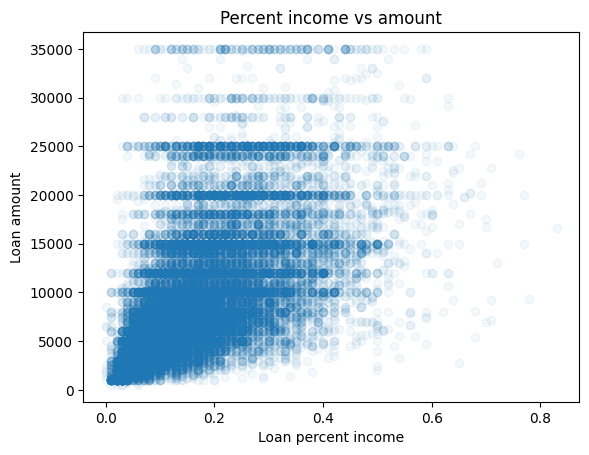

In [168]:
plt.plot(data['loan_percent_income'], data['loan_amnt'], 'o', alpha = 0.05)
plt.xlabel('Loan percent income')
plt.ylabel('Loan amount')
plt.title('Percent income vs amount')
pass

Выведем уникальные значения для категориальных параметров

In [169]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [170]:
data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [171]:
data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [172]:
data['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

# Подготовка данных

Исключим переменную `person_age`, т.к. она сильно коррелирует с `cb_person_cred_hist_length`

In [173]:
data = data.drop('person_age', axis=1)

Выведем количество объектов, принадлежащих каждому из классов

<AxesSubplot: xlabel='loan_status', ylabel='count'>

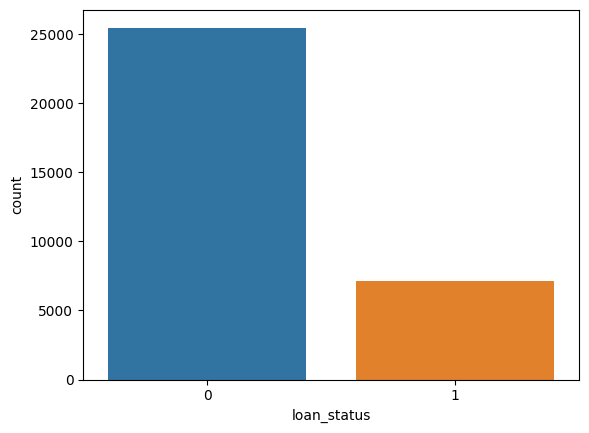

In [174]:
sns.countplot(x=data['loan_status'],data=data)

Сильной несбалансированности классов нет

Разделим признаки на числовые и категориальные

In [175]:
l_status = data['loan_status']
data = data.drop('loan_status', axis=1)

In [176]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


Выделим среди категориальных признаков бинарные и небинарные, для этого выясним уникальные значения каждого категориального признака

In [177]:
for c in categorical_columns:
    print(c, data[c].unique())

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file ['Y' 'N']


In [178]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['cb_person_default_on_file'] ['person_home_ownership', 'loan_intent', 'loan_grade']


По количеству непустых ячеек определим, есть ли пропущенные значения

In [179]:
data.count()

person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

Есть пропущенные значения, обработаем их

Пропущенное значение будем заполнять медианным, если признак числовой, и самым популярным, если признак категориальный

In [180]:
data.median(axis = 0)

person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64

In [181]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [182]:
data[numerical_columns].count(axis = 0)

person_income                 32581
person_emp_length             32581
loan_amnt                     32581
loan_int_rate                 32581
loan_percent_income           32581
cb_person_cred_hist_length    32581
dtype: int64

In [183]:
data[categorical_columns].count(axis = 0)

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [184]:
data.describe(include = [object])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [185]:
for c in categorical_columns:
    data[c] = data[c].fillna(data.describe(include = [object])[c]['top'])

In [186]:
data.describe(include = [object])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


Применим метод векторизации для категориальных признаков

In [187]:
data_binary = pd.get_dummies(data[binary_columns], drop_first=True)
print(data_binary.columns)

Index(['cb_person_default_on_file_Y'], dtype='object')


In [188]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')


Нормализуем количественные признаки для улучшения работы некоторых алгоритмов машинного обучения

In [189]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.767994,9589.371106,11.009620,0.170203,5.804211
std,6.198312e+04,4.087372,6322.086646,3.081611,0.106782,4.055001
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,7.920000e+04,7.000000,12200.000000,13.110000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [190]:
data_numerical = (data_numerical - data_numerical.mean(axis=0))/data_numerical.std(axis=0)

In [191]:
data_numerical.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04
mean,6.978720e-17,1.395744e-17,-5.582976e-17,3.284360e-16,-2.651914e-16,-1.674893e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.001480e+00,-1.166518e+00,-1.437717e+00,-1.813863e+00,-1.593938e+00,-9.381529e-01
25%,-4.448767e-01,-6.772062e-01,-7.259266e-01,-8.176307e-01,-7.510973e-01,-6.915438e-01
50%,-1.786752e-01,-1.878942e-01,-2.513998e-01,-6.366807e-03,-1.892036e-01,-4.449348e-01
75%,2.117536e-01,5.460738e-01,4.129379e-01,6.815850e-01,5.599880e-01,5.415014e-01
max,9.573454e+01,2.892617e+01,4.019342e+00,3.962336e+00,6.178925e+00,5.966901e+00


Соединяем все в одну таблицу

In [192]:
data = pd.concat((data_numerical, data_nonbinary, data_binary), axis=1)
print(data.shape)

(32581, 24)


In [193]:
data.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,6.978720e-17,1.395744e-17,-5.582976e-17,3.284360e-16,-2.651914e-16,-1.674893e-16,0.412633,0.003284,0.079310,0.504773,...,0.169455,0.175532,0.330776,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492315,0.057214,0.270226,0.499985,...,0.375159,0.380427,0.470500,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106
min,-1.001480e+00,-1.166518e+00,-1.437717e+00,-1.813863e+00,-1.593938e+00,-9.381529e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.448767e-01,-6.772062e-01,-7.259266e-01,-8.176307e-01,-7.510973e-01,-6.915438e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.786752e-01,-1.878942e-01,-2.513998e-01,-6.366807e-03,-1.892036e-01,-4.449348e-01,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.117536e-01,5.460738e-01,4.129379e-01,6.815850e-01,5.599880e-01,5.415014e-01,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.573454e+01,2.892617e+01,4.019342e+00,3.962336e+00,6.178925e+00,5.966901e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

Разбиваем данные на X и y

In [194]:
X = data
y = l_status
feature_names = X.columns

In [195]:
type(feature_names)

pandas.core.indexes.base.Index

In [196]:
feature_names

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [197]:
X = X.to_numpy()

In [198]:
y = y.to_numpy()

In [199]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32581, 24)
(32581,)


# Разбиваем на тестовую и обучающую выборки

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

22806 9775


# Обучение

# kNN

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [202]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.11570332480818414

In [203]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[7499  114]
 [1017 1145]]


Подбор параметров

In [204]:
# from sklearn.model_selection import GridSearchCV
# nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_err, best_n_neighbors)

In [205]:
# knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09278260106989389 0.10025575447570333


# SVC

In [206]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.08769622029290537 0.09370843989769821


Подбор параметров (вычисляются медленно)

In [207]:
# from sklearn.model_selection import GridSearchCV
# Cs = 10.**np.arange(-5, 5)
# gamma_array = 10.**np.arange(-5, 5)
# svc = SVC(gamma='auto')
# grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_C = grid.best_estimator_.C
# print(best_cv_err, best_C)

In [208]:
# svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)
svc = SVC(C = 1, gamma='auto').fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09278260106989389 0.10025575447570333


# Extremely Randomized Trees

In [209]:
from sklearn import ensemble

ert = ensemble.ExtraTreesClassifier(n_estimators = 150).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.08132992327365729


# AdaBoost

In [210]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.10506007191090064 0.10649616368286445


# GBT

In [211]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 760)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.05498553012365167 0.0677237851662404


# Промежуточные выводы

Параметр n = 45 алгоритма `kNN` показал лучший результат при решении данной задачи. Ошибка на обучающей выборке составила 9.3%, на тестовой 10%. Таким образом, можно сделать вывод о том, что переобучения с помощью данного алгоритма не происходит (ошибки для тестовой и обучающей выборок примерно равны). Однако, при обучении другими алгоритмами, ошибку удалось сократить сильнее.

Лучшим образом показал себя алгоритм `GBT`, при его использовании ошибка на обучающей выборке составила  5.5%. На тестовой выборке ошибка составила 6.7%. Данный результат показывает, что переобучения не произошло. Алгоритм `Extremely Randomized Trees` дал переобучение (ошибка на обучающей выборке составила 0%, а на тестовой 8%).

Для представленного датасета была проделана предобработка данных и произведено обучение с помощью различных алгоритмов. Выбранные алгоритмы произвели различные результаты, лучший из них - ошибка 6.7%. Данную ошибку можно уменьшить, используя при обучении нейронные сети.

# Logistic regression

In [249]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.132991318074191, 0.13493606138107417)

# Подбор гиперпараметров Logistic regression

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [267]:
c_par = np.linspace(0.5, 4., 20)

test_err_lr = []
train_err_lr = []
train_acc_lr = []
test_acc_lr = []

for c in c_par:
    lr = LogisticRegression(max_iter=1000, C=c)
    lr.fit(X_train, y_train)

    y_train_lr_pred = lr.predict(X_train)
    y_test_lr_pred = lr.predict(X_test)
    
    train_err_lr.append(np.mean(y_train != y_train_lr_pred))
    test_err_lr.append(np.mean(y_test != y_test_lr_pred))
    train_acc_lr.append(accuracy_score(y_train, y_train_lr_pred))
    test_acc_lr.append(accuracy_score(y_test, y_test_lr_pred))

**Графики изменения метрик в зависимости от C**

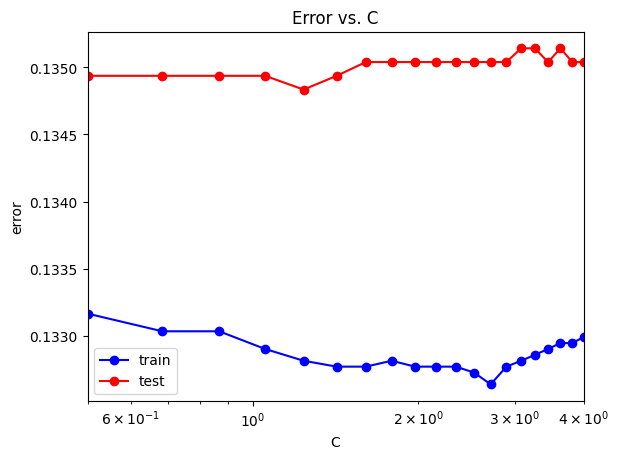

In [268]:
plt.semilogx(c_par, train_err_lr, 'b-o', label='train')
plt.semilogx(c_par, test_err_lr, 'r-o', label='test')
plt.xlim([np.min(c_par), np.max(c_par)])
plt.title('Error vs. C')
plt.xlabel('C')
plt.ylabel('error')
plt.legend()

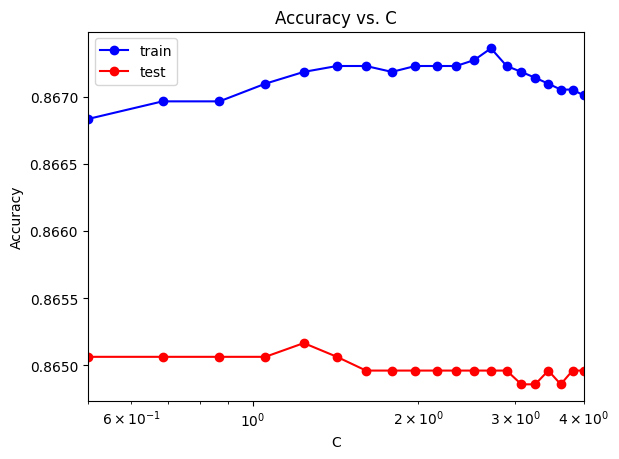

In [269]:
plt.semilogx(c_par, train_acc_lr, 'b-o', label = 'train')
plt.semilogx(c_par, test_acc_lr, 'r-o', label = 'test')
plt.xlim([np.min(c_par), np.max(c_par)])
plt.title('Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки

In [270]:
min_train_err_lr = np.min(train_err_lr)
min_test_err_lr = np.min(test_err_lr)
print(min_train_err_lr, min_test_err_lr)

0.13264053319301938 0.13483375959079283


Оптимальное значение C

In [271]:
c_opt = c_par[test_err_lr == min_test_err_lr]
print(c_opt)
c_opt = c_opt[0]

[1.23684211]


### Confusion matrix

In [272]:
print(confusion_matrix(y_test_lr_pred, y_test))

[[7251  958]
 [ 362 1204]]


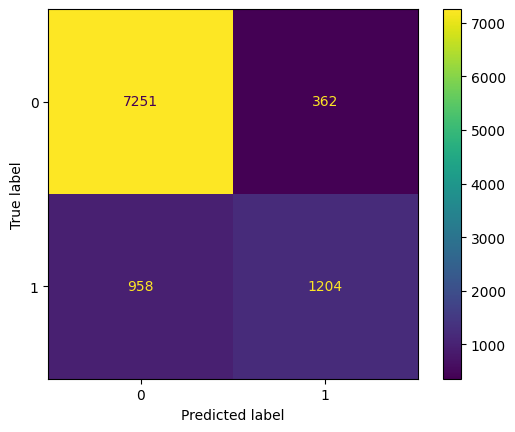

In [273]:
plot_confusion_matrix(lr, X_test, y_test)

# Random Forest

In [274]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0680306905370844


# Подбор гиперпараметров Random Forest

In [275]:
nem_par = np.linspace(10, 500, 15, dtype=np.int32)

test_err_rf = []
train_err_rf = []
train_acc_rf = []
test_acc_rf = []

for nem in nem_par:
    rf = ensemble.RandomForestClassifier(n_estimators=nem)
    rf.fit(X_train, y_train)

    y_train_rf_pred = rf.predict(X_train)
    y_test_rf_pred = rf.predict(X_test)
    
    train_err_rf.append(np.mean(y_train != y_train_rf_pred))
    test_err_rf.append(np.mean(y_test != y_test_rf_pred))
    train_acc_rf.append(accuracy_score(y_train, y_train_rf_pred))
    test_acc_rf.append(accuracy_score(y_test, y_test_rf_pred))

**Графики изменения метрик в зависимости от n_estimators**

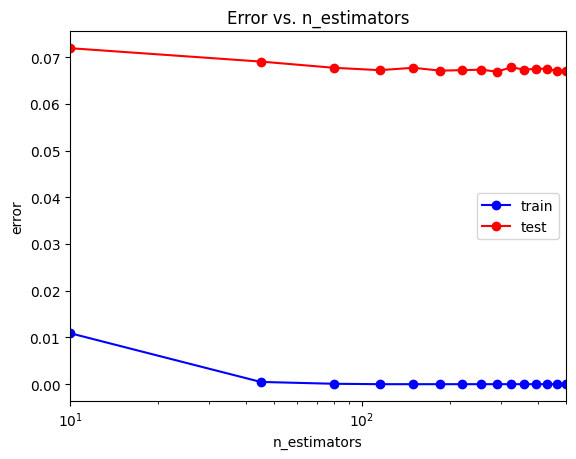

In [276]:
plt.semilogx(nem_par, train_err_rf, 'b-o', label='train')
plt.semilogx(nem_par, test_err_rf, 'r-o', label='test')
plt.xlim([np.min(nem_par), np.max(nem_par)])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

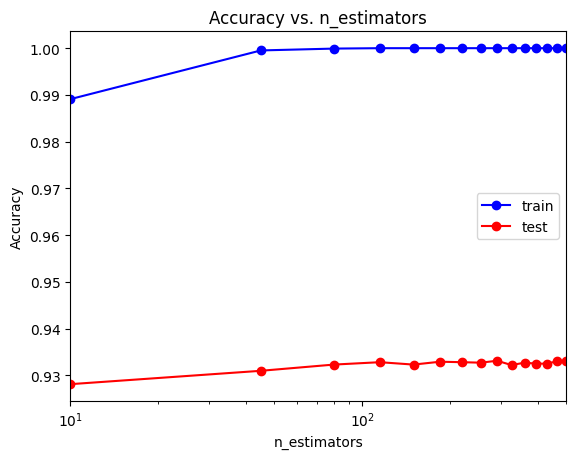

In [277]:
plt.semilogx(nem_par, train_acc_rf, 'b-o', label = 'train')
plt.semilogx(nem_par, test_acc_rf, 'r-o', label = 'test')
plt.xlim([np.min(nem_par), np.max(nem_par)])
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки

In [278]:
min_train_err_rf = np.min(train_err_rf)
min_test_err_rf = np.min(test_err_rf)
print(min_train_err_rf, min_test_err_rf)

0.0 0.06690537084398977


Оптимальное значение n_estimators

In [279]:
n_estimators_opt = nem_par[test_err_rf == min_test_err_rf]
print(n_estimators_opt)
n_estimators_opt = n_estimators_opt[0]

[290]


### Confusion matrix

In [280]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_rf_pred, y_test))

[[7566  608]
 [  47 1554]]


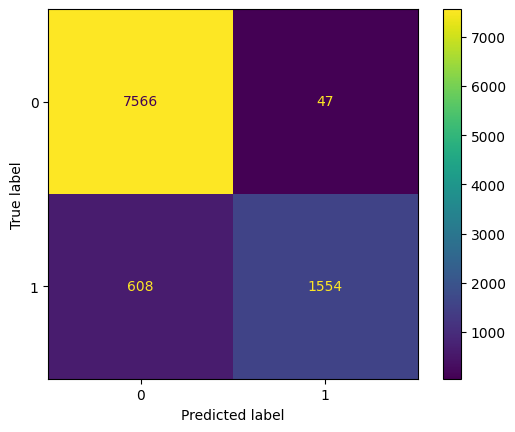

In [281]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

# Обучение классификатора

In [221]:
from sklearn.neural_network import MLPClassifier

In [222]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20, 20),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42,
                          max_iter = 1000)

In [223]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 10min 27s
Wall time: 1min 28s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=1000, random_state=42, solver='lbfgs')

In [224]:
y_train_mlp_pred = mlp_model.predict(X_train)
y_test_mlp_pred = mlp_model.predict(X_test)

In [225]:
print(np.mean(y_train != y_train_mlp_pred), np.mean(y_test != y_test_mlp_pred))

0.0004823292116109796 0.12092071611253197


# Подбор гиперпараметров классификатора

In [282]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20, 20), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1500, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_mlp_pred = mlp_model.predict(X_train)
    y_test_mlp_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_mlp_pred))
    test_err.append(np.mean(y_test != y_test_mlp_pred))
    train_acc.append(accuracy_score(y_train, y_train_mlp_pred))
    test_acc.append(accuracy_score(y_test, y_test_mlp_pred))

**Графики изменения метрик в зависимости от alpha**

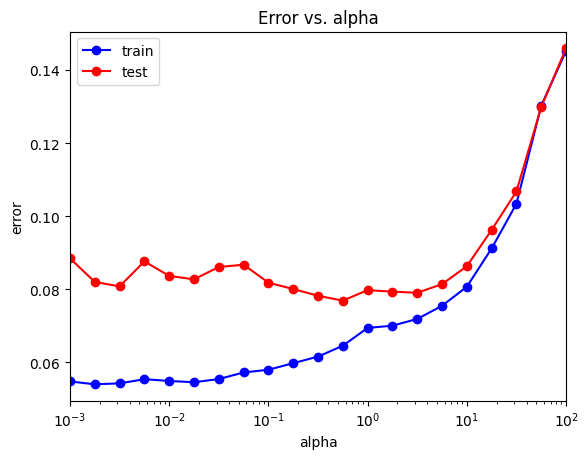

In [283]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

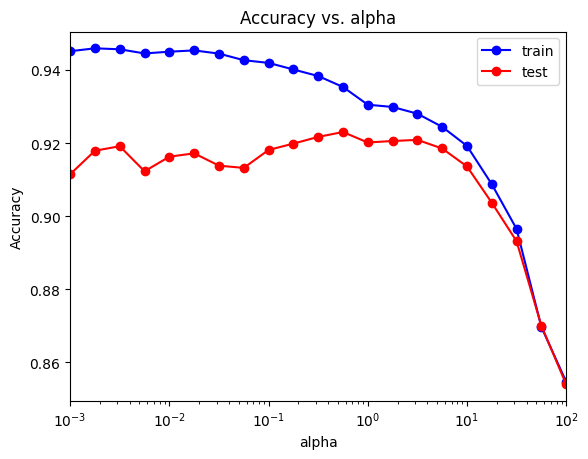

In [284]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки

In [285]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.05402087170042971 0.0769309462915601


Оптимальное значение alpha

In [286]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[0.56234133]


# Обучение классификатора с найденным оптимальным параметром alpha

In [287]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (20, 20),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter=1500)
mlp_model.fit(X_train, y_train)

y_train_mlp_pred = mlp_model.predict(X_train)
y_test_mlp_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_mlp_pred))
print(np.mean(y_test != y_test_mlp_pred))

0.0645882662457248
0.0769309462915601


### Confusion matrix

In [288]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_mlp_pred, y_test))

[[7504  643]
 [ 109 1519]]


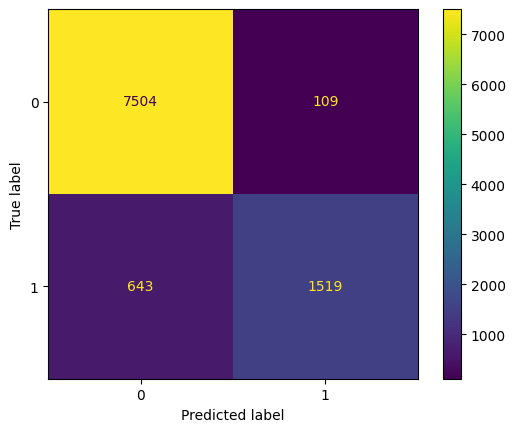

In [289]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 

# Выводы

Были обучены логистическая регрессия, `Random Forest`, и полносвязная нейронная сеть. Для каждой модели были найдены оптимальные значения некоторых гиперпараметров.

Логистическая регрессия показала худший результат. При оптимальном параметре C = 1.23684211 (величина, обратная силе регуляризации) ошибка на обучающей выборке составила 13.2%, а на тестовой - 13.4%. По данным результатам можно сказать, что переобучения не происходит. Из матрицы корреляции видно, что модель чаще допускает ошибку для объектов из первого класса. Это объясняется тем, что в данных присутствует небольшая несбалансированность классов (объектов 1 класса больше, чем объектов 2). Для устранения данного недостатка можно попробовать побороться с несбалансированностью классов.

Лучше логистической регрессии показала себя полносвязная нейронная сеть с 1 скрытым слоем. При оптимальном параметре alpha = 0.56234133, ошибка на обучающей выборке составила 5.4%, а на тестовой - 7.7%. Переобучения не наблюдается. Матрица корреляции аналогична взятой с модели логистической регрессии.

Наилучший результат показала модель `Random Forest`. При оптимальном параметре n_estimators = 290 (число деревьев), ошибка на обучающей выборке составила 0%, а на тестовой - 6.7%, что говорит о явном переобучении. Матрица корреляции показывает результат, похожий на полученный из матрицы корреляции для модели логистической регрессии.